In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
import joblib

# Load data

In [ ]:
data_path = "./drive/MyDrive/Colab Notebooks/datasets/rever_dataset.csv"
data=pd.read_csv(data_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,88,105,140,150,165) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Overview about data

In [ ]:
data.describe()

,num_bed_room,area,created_time,property_type,has_media,direction,published_time,rental_price_vnd,service_type,property_status,sell_price_vnd,updated_time,num_bath_room,balcony_direction,listing_opportunity_id,content_status,juridical_status,house_status,architectural_style,rent_discount_vnd,sale_discount_vnd,media_status,province,bed_materials,kitchen_island_materials
count,30313.000000,30323.000000,3.032300e+04,30323.000000,1715.000000,30322.000000,3.032300e+04,3.032300e+04,30323.000000,30323.0,3.032300e+04,3.032300e+04,30313.000000,28870.000000,11025.000000,2853.000000,28903.0,28903.0,28907.000000,2.144300e+04,1.793000e+04,46.000000,0.0,0.0,0.0
mean,2.159305,86.989396,1.611200e+12,4.154009,0.997668,3.436317,1.616411e+12,2.172873e+10,1.743297,700.0,3.584554e+09,1.631542e+12,1.923432,2.545376,1596.965533,1.702068,0.0,0.0,2.228699,-1.410617e+04,-4.909095e+07,1.913043,NaN,NaN,NaN
std,1.489558,189.473231,2.723341e+10,5.923369,0.307425,3.030324,2.684733e+10,1.800072e+12,0.507442,0.0,6.340382e+09,7.076561e+09,1.488401,2.918371,4805.629906,0.874037,0.0,0.0,1.291509,1.182868e+06,5.186880e+09,0.962083,NaN,NaN,NaN
min,0.000000,0.000000,1.465286e+12,1.000000,0.000000,0.000000,1.483083e+12,0.000000e+00,1.000000,700.0,0.000000e+00,1.610973e+12,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,-9.999990e+07,-6.800000e+11,1.000000,NaN,NaN,NaN
25%,2.000000,53.200000,1.605661e+12,1.000000,1.000000,0.000000,1.611128e+12,0.000000e+00,1.000000,700.0,0.000000e+00,1.631175e+12,1.000000,0.000000,0.000000,1.000000,0.0,0.0,1.000000,0.000000e+00,0.000000e+00,1.000000,NaN,NaN,NaN
50%,2.000000,69.000000,1.616507e+12,1.000000,1.000000,3.000000,1.624419e+12,0.000000e+00,2.000000,700.0,2.650000e+09,1.635477e+12,2.000000,1.000000,0.000000,1.000000,0.0,0.0,3.000000,0.000000e+00,0.000000e+00,1.500000,NaN,NaN,NaN
75%,3.000000,85.000000,1.628225e+12,8.000000,1.000000,6.000000,1.632367e+12,1.050000e+07,2.000000,700.0,4.420000e+09,1.635730e+12,2.000000,5.000000,0.000000,3.000000,0.0,0.0,3.000000,0.000000e+00,0.000000e+00,3.000000,NaN,NaN,NaN
max,54.000000,11000.000000,1.636948e+12,64.000000,3.000000,8.000000,1.636955e+12,1.819545e+14,3.000000,700.0,4.800000e+11,1.636955e+12,54.000000,8.000000,28572.000000,7.000000,0.0,0.0,3.000000,1.000000e+02,1.000000e+02,3.000000,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30323 entries, 0 to 30322
Columns: 166 entries, furniture_status to dining_table_and_chairs
dtypes: bool(3), float64(19), int64(6), object(138)
memory usage: 37.8+ MB


In [ ]:
# Convert data type boolean (True/False) to int (1/0)
data = data*1

In [ ]:
# data_test = data.drop(index=data[data['rental_price_vnd'] < 1000000000].index)
# corr_matrix = data_test.corr()
# np.abs(corr_matrix['rental_price_vnd']).sort_values(ascending = False)

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
df_data_rental = data.drop(index=data[data['rental_price_vnd'] == 0].index)
# profile = ProfileReport(
#     df_data_rental, title="Pandas Profiling Report for Rever dataset rental"
# )
# profile.to_file("./rever_dataset_rental.html")

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
df_data_sell = data.drop(index=data[data['sell_price_vnd'] == 0].index)
# profile = ProfileReport(
#     df_data_sell, title="Pandas Profiling Report for Rever dataset sell"
# )
# profile.to_file("./rever_dataset_sell.html")

In [ ]:
category = ['furniture_status',
       'property_type', 'direction', 'ownership',
       'has_3d', 'service_type', 
       'balcony_direction', 'content_status',
       'architectural_style', 'exclusive', 
       'pool', 'open24h', 'garage', 'sauna_bath',
       'working_space', 'relax_room', 'elevator', 'gym', 'cable', 'internet', 'pet', 'steam_bath', 
       'smart_home', 'tv', 'fridge', 'store_house', 'smart_drying_rig',
       'gas_stove', 'mini_bar', 'microwave', 'helper_room',
       'washing_machine', 'oven', 'fire_detection', 'water_heater',
       'password_lock', 'kitchen_hood', 'dryer', 'sound_equipment',
       'air_conditioner', 'fingerprint_lock', 'security_camera', 'garden',
       'magnetic_card_lock', 'city', 'floor_number', 
       'neighborhood_id', 'district_id', 'street_id', 'city_id', 'ward_id', 
       'kitchen_cabinet', 'bed', 'sofa',  'dining_table', 'balcony',
       'kitchen_equipment', 'multimedia',
       'makeup_table', 'wardrobe', 'kitchen', 'table', 
       'pillow_cushions', 'shoe_cabinet', 'washstand',
       'kitchen_island', 'bathtub',
       'bedside_cupboard', 'decorative_fight',
       'wet_kitchen', 'tv_shelf',
       'bookshelf', 'wall_cabinet', 'ceiling_light', 'toilet_bowl',
       'wood_floor', 'kitchen_cabinet_above', 'table_lamp', 'dry_kitchen', 'tv_cabinet', 'liquor_cabinet']

numeric = ['num_bath_room', 'num_bed_room', 'area']

column = category + numeric + ['rental_price_vnd']
column_sell = category + numeric + ['sell_price_vnd']

df_data_rental = data.drop(index=data[data['rental_price_vnd'] == 0].index)
df_data_rental = df_data_rental.drop(index=df_data_rental[df_data_rental['rental_price_vnd'] < 2000000].index)
df_data_rental = df_data_rental.drop(index=df_data_rental[df_data_rental['rental_price_vnd'] > 500000000].index)
df_data_rental = df_data_rental[column]

df_data_sell = data.drop(index=data[data['sell_price_vnd'] == 0].index)
df_data_sell = df_data_sell.drop(index=df_data_sell[df_data_sell['sell_price_vnd'] < 100000000].index)
df_data_sell = df_data_sell.drop(index=df_data_sell[df_data_sell['sell_price_vnd'] > 100000000000].index)
df_data_sell = df_data_sell[column_sell]
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# # df_data_rental.fillna(df_data_rental.mode().iloc[0], inplace=True)
# df_data_rental = imputer.fit(df_data_rental)
print(df_data_sell.shape)
df_data_sell["sell_price_vnd"].describe()

(21774, 85)


count    2.177400e+04
mean     4.893738e+09
std      5.059891e+09
min      1.000000e+08
25%      2.450000e+09
50%      3.450000e+09
75%      5.400000e+09
max      9.900000e+10
Name: sell_price_vnd, dtype: float64

In [ ]:
# df_test = df_data_rental[df_data_rental['property_type'] == 64]
# df_test["rental_price_vnd"].describe()

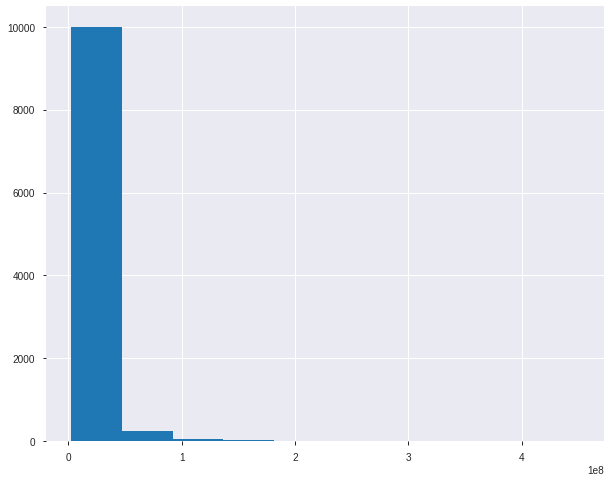

In [ ]:
%matplotlib inline
df_data_rental['rental_price_vnd'].hist(figsize = (10, 8))
plt.show()

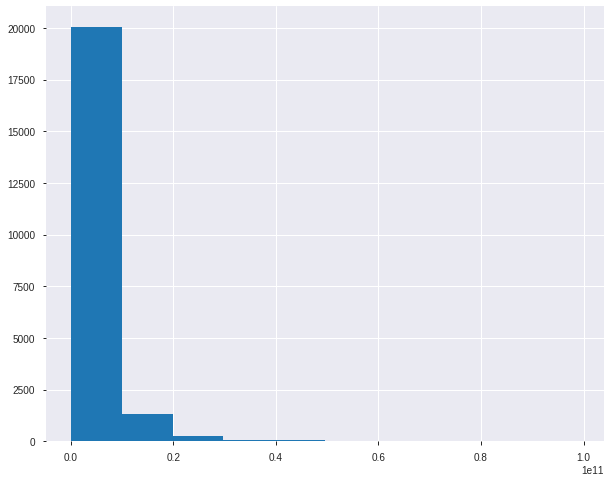

In [ ]:
%matplotlib inline
df_data_sell['sell_price_vnd'].hist(figsize = (10, 8))
plt.show()

# Select feature and Preprocess data


In [ ]:
# create correlation matrix 
corr_matrix_rental = df_data_rental.corr()
np.abs(corr_matrix_rental['rental_price_vnd']).sort_values(ascending = True)

direction              0.004535
service_type           0.009770
architectural_style    0.057481
has_3d                 0.083212
balcony_direction      0.091061
property_type          0.159893
num_bed_room           0.189368
num_bath_room          0.212661
content_status         0.272377
area                   0.360850
rental_price_vnd       1.000000
Name: rental_price_vnd, dtype: float64

In [ ]:
# Convert data in category column to category type
for i in category: 
  df_data_rental[i] = df_data_rental[i].astype('category').cat.codes

for i in category: 
  df_data_sell[i] = df_data_sell[i].astype('category').cat.codes

In [ ]:
df_data_rental.isnull().sum().sort_values(ascending=False)

num_bed_room         2
num_bath_room        2
rental_price_vnd     0
helper_room          0
smart_home           0
                    ..
kitchen_equipment    0
multimedia           0
makeup_table         0
wardrobe             0
furniture_status     0
Length: 85, dtype: int64

In [ ]:
df_data_sell.isnull().sum().sort_values(ascending=False)

num_bed_room         8
num_bath_room        8
sell_price_vnd       0
helper_room          0
smart_home           0
                    ..
kitchen_equipment    0
multimedia           0
makeup_table         0
wardrobe             0
furniture_status     0
Length: 85, dtype: int64

In [ ]:
#Replace missing value by K-nearest-neighbor algorithm
_data_rental = df_data_rental.drop("rental_price_vnd", axis = 1).replace(-1, np.NaN)
rental_imputer = KNNImputer(n_neighbors=1, weights='uniform', metric='nan_euclidean')
data_rental = rental_imputer.fit_transform(_data_rental.values)
data_rental = pd.DataFrame(data_rental, index=_data_rental.index, columns=_data_rental.columns)

In [ ]:
joblib.dump(rental_imputer, "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_imputer.joblib")
joblib.dump(rental_imputer, "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_imputer.pkl")

['/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_imputer.pkl']

In [ ]:
_data_sell = df_data_sell.drop("sell_price_vnd", axis = 1).replace(-1, np.NaN)
sell_imputer = KNNImputer(n_neighbors=1, weights='uniform', metric='nan_euclidean')
data_sell = sell_imputer.fit_transform(_data_sell.values)
data_sell = pd.DataFrame(data_sell, index=_data_sell.index, columns=_data_sell.columns)

In [ ]:
joblib.dump(sell_imputer, "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_imputer.joblib")
joblib.dump(sell_imputer, "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_imputer.pkl")

['/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_imputer.pkl']

In [ ]:
# sell_imputer.shape

# Prepare data for training

In [ ]:
X_rental= data_rental
y_rental= df_data_rental['rental_price_vnd']

X_sell= data_sell
y_sell= df_data_sell['sell_price_vnd']

X_sell.shape

(21774, 84)

In [ ]:
# # df_data_rental.fillna(df_data_rental.mode().iloc[0], inplace=True)
sell_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), category),
    ])
X_sell = sell_pipeline.fit_transform(pd.DataFrame(X_sell))

In [ ]:
rental_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), category),
    ])
X_rental = rental_pipeline.fit_transform(pd.DataFrame(X_rental))

In [ ]:
joblib.dump(sell_pipeline, "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_pipeline.joblib")
joblib.dump(rental_pipeline, "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_pipeline.joblib")

['/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_pipeline.joblib']

In [ ]:
# Seperate data to train and test
X_rental_train, X_rental_test, y_rental_train, y_rental_test = train_test_split(X_rental, y_rental, test_size = 0.2, random_state = 42)
X_sell_train, X_sell_test, y_sell_train, y_sell_test = train_test_split(X_sell, y_sell, test_size = 0.2, random_state = 42)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Training rental price



In [ ]:
# Use Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_rental_train, y_rental_train)
# lin_scores = cross_val_score(lin_reg, X_rental, y_rental,
#                              scoring="neg_mean_squared_error", cv=5)
# lin_reg_score = lin_reg.score(X_rental_test, y_rental_test)
# lin_scores = np.sqrt(-lin_scores)
# display_scores(lin_scores)
import math
y_rental_test_list = y_rental_test.tolist()
y_rental_predict = lin_reg.predict(X_rental_test)
sum_rental_lin = 0
for index in range(len(y_rental_test)):
  sum_rental_lin += (y_rental_predict[index] - y_rental_test_list[index])**2
mse_rental_lin = sum_rental_lin/len(y_rental_test)
rmse_rental_lin = math.sqrt(mse_rental_lin)

In [ ]:
print(mse_rental_lin)
print(rmse_rental_lin)

219893453856614.44
14828804.869463164


In [ ]:
joblib.dump(lin_reg, "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_lin_reg.joblib")

['/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_lin_reg.joblib']

In [ ]:
# housing_prediction = lin_reg.predict(X_rental_train)
# tree_mse = mean_squared_error(y_rental_train,housing_prediction)
# tree_rmse = np.sqrt(tree_mse)
# print("tree_rmse: ", tree_rmse)

In [ ]:
# Use Decision Tree Regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_rental_train, y_rental_train)
# tree_score = cross_val_score(tree_reg, X_rental_test, y_rental_test,
#                              scoring="neg_mean_squared_error", cv=100)
# tree_score = np.sqrt(-tree_score)
# display_scores(tree_score)
y_rental_predict = tree_reg.predict(X_rental_test)
sum_rental_tree = 0
for index in range(len(y_rental_test)):
  sum_rental_tree += (y_rental_predict[index] - y_rental_test_list[index])**2
mse_rental_tree = sum_rental_tree/len(y_rental_test)
rmse_rental_tree = math.sqrt(mse_rental_tree)

In [ ]:
print(mse_rental_tree)
print(rmse_rental_tree)

227954213684262.16
15098152.657999659


In [ ]:
joblib.dump(tree_reg, "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_tree_reg.joblib")

['/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_tree_reg.joblib']

In [ ]:
# housing_prediction = tree_reg.predict(X_rental_train)
# tree_mse = mean_squared_error(y_rental_train,housing_prediction)
# tree_rmse = np.sqrt(tree_mse)
# print("tree_rmse: ", tree_rmse)

In [ ]:
# Select hyper parameter for Random Forest Regressor
# param_grid = {'n_estimators': [100,300, 500],'max_depth': [None], 'max_features':['auto','log2','sqrt']}
# rf_grid = GridSearchCV(RandomForestRegressor(random_state=13, n_jobs=-1), param_grid, cv=4)
# rf_grid.fit(X_rental_train, y_rental_train)
# print(rf_grid.best_estimator_)
# print(rf_grid.best_params_)
# rf_score = rf_grid.best_score_
# print(rf_score) 

In [ ]:
# display_scores(rf_score)

In [ ]:
# Use Random Forest Regressor
forest_reg = RandomForestRegressor(max_features='log2', n_estimators=300, n_jobs=-1, random_state=13)
forest_reg.fit(X_rental_train, y_rental_train)
# forest_scores = cross_val_score(forest_reg, X_rental_test, y_rental_test, scoring = "neg_mean_squared_error", cv = 100)
# forest_scores = np.sqrt(-forest_scores)
# display_scores(forest_scores)
y_rental_predict = forest_reg.predict(X_rental_test)
sum_rental_forest = 0
for index in range(len(y_rental_test)):
  sum_rental_forest += (y_rental_predict[index] - y_rental_test_list[index])**2
mse_rental_forest = sum_rental_forest/len(y_rental_test)
rmse_rental_forest = math.sqrt(mse_rental_forest)

In [ ]:
print(mse_rental_forest)
print(rmse_rental_forest)

107585926250850.95
10372363.58072985


In [ ]:
joblib.dump(forest_reg, "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_forest_reg.joblib")

['/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_forest_reg.joblib']

# Training sell price

In [ ]:
# Use Linear Regression
lin_reg_sell = LinearRegression()
lin_reg_sell.fit(X_sell_train, y_sell_train)
# lin_scores_sell = cross_val_score(lin_reg_sell, X_sell_test, y_sell_test,
#                              scoring="neg_mean_squared_error", cv=100)
# lin_scores_sell = np.sqrt(-lin_scores_sell)
# display_scores(lin_scores_sell)
y_sell_test_list = y_sell_test.tolist()
y_sell_predict = lin_reg_sell.predict(X_sell_test)
sum_sell_lin = 0
for index in range(len(y_sell_test)):
  sum_sell_lin += (y_sell_predict[index] - y_sell_test_list[index])**2
mse_sell_lin = sum_sell_lin/len(y_sell_test)
rmse_sell_lin = math.sqrt(mse_sell_lin)

In [ ]:
print(mse_sell_lin)
print(rmse_sell_lin)

1.7490699473622895e+19
4182188359.4145894


In [ ]:
joblib.dump(lin_reg_sell, "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_lin_reg.joblib")

['/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_lin_reg.joblib']

In [ ]:
# Use Decision Tree Regressor
tree_reg_sell = DecisionTreeRegressor()
tree_reg_sell.fit(X_sell_train, y_sell_train)
# tree_score_sell = cross_val_score(tree_reg_sell, X_sell_test, y_sell_test,
#                              scoring="neg_mean_squared_error", cv=100)
# tree_score_sell = np.sqrt(-tree_score_sell)
# display_scores(tree_score_sell)
y_sell_predict = tree_reg_sell.predict(X_sell_test)
sum_sell_tree = 0
for index in range(len(y_sell_test)):
  sum_sell_tree += (y_sell_predict[index] - y_sell_test_list[index])**2
mse_sell_tree = sum_sell_tree/len(y_sell_test)
rmse_sell_tree = math.sqrt(mse_sell_tree)

In [ ]:
print(mse_sell_tree)
print(rmse_sell_tree)

1.785498076113851e+19
4225515443.2493215


In [ ]:
joblib.dump(tree_reg_sell, "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_tree_reg.joblib")

['/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_tree_reg.joblib']

In [ ]:
# Select hyper parameter for Random Forest Regressor
param_grid = {'n_estimators': [100,300, 500],'max_depth': [None], 'max_features':['auto','log2','sqrt']}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=13, n_jobs=-1), param_grid, cv=4)
rf_grid.fit(X_sell_train[:1000], y_sell_train[:1000])
print(rf_grid.best_estimator_)
print(rf_grid.best_params_)
rf_score = rf_grid.best_score_
print(rf_score)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=13)
{'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}
0.22086436911629004


In [ ]:
# Use Random Forest Regressor
forest_reg_sell = RandomForestRegressor(max_features='auto', n_estimators=100, n_jobs=-1, random_state=13)
forest_reg_sell.fit(X_sell_train, y_sell_train)
# forest_scores_sell = cross_val_score(forest_reg_sell, X_sell_test, y_sell_test, scoring = "neg_mean_squared_error", cv = 100)
# forest_scores_sell = np.sqrt(-forest_scores_sell)
# display_scores(forest_scores_sell)
y_sell_predict = forest_reg_sell.predict(X_sell_test)
sum_sell_forest = 0
for index in range(len(y_sell_test)):
  sum_sell_forest += (y_sell_predict[index] - y_sell_test_list[index])**2
mse_sell_forest = sum_sell_forest/len(y_sell_test)
rmse_sell_forest = math.sqrt(mse_sell_forest)

In [ ]:
print(mse_sell_forest)
print(rmse_sell_forest)

1.0399289407553296e+19
3224792924.7555256


In [ ]:
joblib.dump(forest_reg_sell, "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_forest_reg.joblib")

['/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_forest_reg.joblib']

# Predict value


In [ ]:
imputer_path = "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_imputer.joblib"
sell_forest_reg_path = "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_forest_reg.joblib"
sell_lin_reg_path = "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_lin_reg.joblib"
sell_tree_reg_path = "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_tree_reg.joblib"
pipeline_path = "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/sell_pipeline.joblib"


category = ['furniture_status',
     'property_type', 'direction', 'ownership',
     'has_3d', 'service_type', 
     'balcony_direction', 'content_status',
     'architectural_style', 'exclusive', 
     'pool', 'open24h', 'garage', 'sauna_bath',
     'working_space', 'relax_room', 'elevator', 'gym', 'cable', 'internet', 'pet', 'steam_bath', 
     'smart_home', 'tv', 'fridge', 'store_house', 'smart_drying_rig',
     'gas_stove', 'mini_bar', 'microwave', 'helper_room',
     'washing_machine', 'oven', 'fire_detection', 'water_heater',
     'password_lock', 'kitchen_hood', 'dryer', 'sound_equipment',
     'air_conditioner', 'fingerprint_lock', 'security_camera', 'garden',
     'magnetic_card_lock', 'city', 'floor_number', 
     'neighborhood_id', 'district_id', 'street_id', 'city_id', 'ward_id', 
     'kitchen_cabinet', 'bed', 'sofa',  'dining_table', 'balcony',
     'kitchen_equipment', 'multimedia',
     'makeup_table', 'wardrobe', 'kitchen', 'table', 
     'pillow_cushions', 'shoe_cabinet', 'washstand',
     'kitchen_island', 'bathtub',
     'bedside_cupboard', 'decorative_fight',
     'wet_kitchen', 'tv_shelf',
     'bookshelf', 'wall_cabinet', 'ceiling_light', 'toilet_bowl',
     'wood_floor', 'kitchen_cabinet_above', 'table_lamp', 'dry_kitchen', 'tv_cabinet', 'liquor_cabinet']

numeric = ['num_bath_room', 'num_bed_room', 'area']

def predict_sell_value(x, imputer_path = imputer_path, model_path = sell_forest_reg_path): 
  column_sell = category + numeric
  df_data_sell = x[column_sell]
  for i in category: 
    df_data_sell[i] = df_data_sell[i].astype('category').cat.codes
  
  imputer = joblib.load(imputer_path)
  df_data_sell = df_data_sell.replace(-1, np.NaN)
  sell_imputer = imputer.transform(df_data_sell.values)
  data_sell = pd.DataFrame(sell_imputer, index=df_data_sell.index, columns=df_data_sell.columns)

  # full_pipeline = ColumnTransformer([
  #       ("cat", OneHotEncoder(), category),
  #   ])
  full_pipeline = joblib.load(pipeline_path)
  X_sell = full_pipeline.transform(data_sell)
  print(X_sell.shape)
  model_selection = joblib.load(model_path)
  return model_selection.predict(X_sell)*0.9

In [ ]:
print(predict_sell_value(data[:10]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(10, 2128)
[2.673900e+09 2.598831e+09 4.310100e+09 2.306385e+09 4.284000e+09
 5.578200e+09 2.873538e+09 5.552730e+09 5.387922e+09 2.763054e+09]


In [ ]:
imputer_path = "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_imputer.joblib"
rental_forest_reg_path = "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_forest_reg.joblib"
rental_lin_reg_path = "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_lin_reg.joblib"
rental_tree_reg_path = "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_tree_reg.joblib"
pipeline_path = "/content/drive/MyDrive/Colab Notebooks/Rever_Predict_House_Value/rental_pipeline.joblib"


category = ['furniture_status',
     'property_type', 'direction', 'ownership',
     'has_3d', 'service_type', 
     'balcony_direction', 'content_status',
     'architectural_style', 'exclusive', 
     'pool', 'open24h', 'garage', 'sauna_bath',
     'working_space', 'relax_room', 'elevator', 'gym', 'cable', 'internet', 'pet', 'steam_bath', 
     'smart_home', 'tv', 'fridge', 'store_house', 'smart_drying_rig',
     'gas_stove', 'mini_bar', 'microwave', 'helper_room',
     'washing_machine', 'oven', 'fire_detection', 'water_heater',
     'password_lock', 'kitchen_hood', 'dryer', 'sound_equipment',
     'air_conditioner', 'fingerprint_lock', 'security_camera', 'garden',
     'magnetic_card_lock', 'city', 'floor_number', 
     'neighborhood_id', 'district_id', 'street_id', 'city_id', 'ward_id', 
     'kitchen_cabinet', 'bed', 'sofa',  'dining_table', 'balcony',
     'kitchen_equipment', 'multimedia',
     'makeup_table', 'wardrobe', 'kitchen', 'table', 
     'pillow_cushions', 'shoe_cabinet', 'washstand',
     'kitchen_island', 'bathtub',
     'bedside_cupboard', 'decorative_fight',
     'wet_kitchen', 'tv_shelf',
     'bookshelf', 'wall_cabinet', 'ceiling_light', 'toilet_bowl',
     'wood_floor', 'kitchen_cabinet_above', 'table_lamp', 'dry_kitchen', 'tv_cabinet', 'liquor_cabinet']

numeric = ['num_bath_room', 'num_bed_room', 'area']

def predict_rental_value(x, imputer_path = imputer_path, model_path = rental_forest_reg_path): 
  column_rental = category + numeric
  df_data_rental = x[column_rental]
  for i in category: 
    df_data_rental[i] = df_data_rental[i].astype('category').cat.codes
  
  imputer = joblib.load(imputer_path)
  df_data_rental = df_data_rental.replace(-1, np.NaN)
  rental_imputer = imputer.transform(df_data_rental.values)
  data_rental = pd.DataFrame(rental_imputer, index=df_data_rental.index, columns=df_data_rental.columns)

  # full_pipeline = ColumnTransformer([
  #       ("cat", OneHotEncoder(), category),
  #   ])
  full_pipeline = joblib.load(pipeline_path)
  X_rental = full_pipeline.transform(data_rental)
  model_selection = joblib.load(model_path)
  return model_selection.predict(X_rental)

In [ ]:
print(predict_rental_value(data[:10]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[21616759.15       22102163.33333333 14655871.66666667 25920176.83333333
 33004530.73333333 28471019.6        37221565.41666666 21677285.85
 19495836.66666667 19798987.91666667]
